In [8]:
# Set up simple CNN for MNIST hand-written digits image recognition
#import the necessary libraries 
%matplotlib inline

import tensorflow as tf 
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [5]:
mnist = tf.keras.datasets.mnist

7


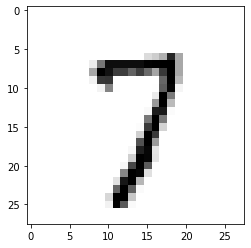

In [11]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

image_index = 258 # You may select anything up to 60,000
print(y_train[image_index]) # The label 
plt.imshow(x_train[image_index], cmap='Greys')

In [12]:
#check the shape of the imput elements

x_train.shape

(60000, 28, 28)

In [13]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [14]:

# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [15]:
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [16]:

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.3630 - accuracy: 0.8901
Epoch 2/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0878 - accuracy: 0.9732
Epoch 3/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0605 - accuracy: 0.9804
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0460 - accuracy: 0.9856
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0335 - accuracy: 0.9887
Epoch 6/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0273 - accuracy: 0.9917
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0258 - accuracy: 0.9913
Epoch 8/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0185 - accuracy: 0.9935
Epoch 9/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0179 - accuracy: 0.9940
Epoch 10/10
1875/1875 [==============================] - 36s 19m

In [17]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0579 - accuracy: 0.9866


[0.05785641446709633, 0.9865999817848206]

5


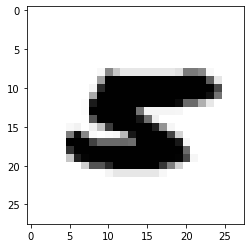

In [23]:
image_index = 7850
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())